In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.express as px
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [4]:
new=pd.read_csv("../input/unemployment-dataset/unemployment analysis.csv",index_col=False)
new.shape

(235, 33)

## BASIC EXPLORATION

In [5]:
new.head(10)

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
5,Arab World,ARB,11.62,12.12,12.86,12.95,13.32,12.38,11.95,11.97,...,10.66,10.74,10.87,10.97,10.76,10.90,10.50,10.01,11.49,11.63
6,United Arab Emirates,ARE,1.87,1.84,1.85,1.81,1.80,1.90,1.98,2.14,...,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
7,Argentina,ARG,5.44,6.36,10.10,11.76,18.80,17.11,14.82,12.65,...,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
8,Armenia,ARM,1.60,1.80,5.30,6.60,6.70,9.30,10.80,9.40,...,17.30,16.18,17.50,18.26,17.62,17.70,18.97,18.30,21.21,20.90
9,Australia,AUS,9.58,10.73,10.87,9.72,8.47,8.51,8.36,7.68,...,5.22,5.66,6.08,6.05,5.71,5.59,5.30,5.16,6.46,5.11


In [6]:
new.isnull().sum() # Checking for null values

Country Name    0
Country Code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [8]:
new.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,...,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,7.278000,7.626340,8.070766,8.246043,8.333915,8.494894,8.394043,8.441064,8.568043,8.438979,...,8.062553,8.086468,7.924340,7.818426,7.720979,7.485404,7.247404,7.087362,8.278809,8.219660
std,6.013749,6.296617,6.335855,6.243778,6.330822,6.358431,6.206845,6.133045,6.088361,6.126318,...,5.780173,5.832019,5.699899,5.574759,5.456333,5.318381,5.240429,5.129146,5.470319,5.506914
min,0.300000,0.340000,0.410000,0.470000,0.500000,0.560000,0.540000,0.560000,0.570000,0.580000,...,0.480000,0.250000,0.200000,0.170000,0.150000,0.140000,0.110000,0.100000,0.210000,0.260000
25%,2.945000,3.140000,3.700000,3.890000,3.945000,3.995000,4.020000,4.085000,4.275000,4.070000,...,4.090000,4.245000,4.200000,4.315000,4.310000,4.075000,3.875000,3.805000,4.620000,4.750000
50%,5.410000,5.710000,6.030000,6.550000,6.700000,7.050000,6.930000,6.890000,6.690000,6.530000,...,6.450000,6.290000,6.150000,6.080000,6.010000,5.800000,5.620000,5.530000,6.800000,6.580000
75%,9.815000,10.170000,10.895000,11.110000,11.050000,11.405000,11.090000,11.500000,11.845000,11.565000,...,10.655000,10.465000,10.290000,10.080000,9.895000,9.445000,9.060000,8.605000,10.230000,10.245000
max,36.120000,36.390000,36.740000,36.980000,37.340000,38.800000,37.940000,37.160000,36.350000,35.460000,...,31.020000,29.000000,28.030000,27.690000,26.540000,27.040000,26.910000,28.470000,29.220000,33.560000


###  Separating First, Second and Third Countries.

In [33]:
first=new.loc[new["Country Name"].isin(["Australia","Japan","United States","Germany","France","United Kingdom","South Korea","Canada","Norway","Sweden","Switzerland","Finland","Singapore"])]
first_group=["Australia","Japan","United States","Germany","France","United Kingdom","South Korea","Canada","Norway","Sweden","Switzerland","Finland","Singapore"]
first= first.reset_index(drop=True)
first.drop(first.iloc[:, 2:16], inplace=True, axis=1) # Selecting data from 2005 to 2021
first

,Country Name,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Australia,AUS,5.03,4.78,4.38,4.23,5.56,5.21,5.08,5.22,5.66,6.08,6.05,5.71,5.59,5.30,5.16,6.46,5.11
1,Canada,CAN,6.76,6.32,6.04,6.14,8.34,8.06,7.51,7.29,7.07,6.91,6.91,7.00,6.34,5.83,5.66,9.46,7.51
2,Switzerland,CHE,4.44,4.00,3.65,3.35,4.12,4.80,4.40,4.48,4.75,4.83,4.80,4.92,4.80,4.71,4.39,4.82,5.32
3,Germany,DEU,11.17,10.25,8.66,7.52,7.74,6.97,5.82,5.38,5.23,4.98,4.62,4.12,3.75,3.38,3.14,3.81,3.54
4,Finland,FIN,8.38,7.72,6.85,6.37,8.25,8.39,7.78,7.69,8.19,8.66,9.38,8.82,8.64,7.36,6.69,7.76,7.53
5,France,FRA,8.49,8.45,7.66,7.06,8.74,8.87,8.81,9.40,9.92,10.29,10.35,10.05,9.41,9.02,8.41,8.01,8.06
6,United Kingdom,GBR,4.75,5.35,5.26,5.62,7.54,7.79,8.04,7.88,7.52,6.11,5.30,4.81,4.33,4.00,3.74,4.47,4.53
7,Japan,JPN,4.45,4.19,3.89,4.00,5.07,5.10,4.55,4.36,4.00,3.60,3.40,3.10,2.80,2.40,2.40,2.80,2.80
8,Norway,NOR,4.38,3.40,2.49,2.55,3.10,3.52,3.21,3.12,3.42,3.48,4.30,4.68,4.16,3.80,3.69,4.42,4.99
9,Singapore,SGP,5.59,4.48,3.90,3.96,5.86,4.12,3.89,3.72,3.86,3.74,3.79,4.08,4.20,3.64,3.10,4.10,3.62


In [35]:
sec=new[new["Country Name"].isin(["India","China","Brazil","Russia","Bangladesh","Indonesia","Malaysia","Mexixo","South Africa","Ukraine","Srilanka","Thailand","Pakistan","Saudi Arabia","Egypt","Argentina"])]
sec= sec.reset_index(drop=True)
sec.drop(sec.iloc[:, 2:16], inplace=True, axis=1) # Selecting data from 2005 to 2021
sec

,Country Name,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Argentina,ARG,11.51,10.08,8.47,7.84,8.65,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
1,Bangladesh,BGD,4.25,3.59,4.13,4.57,5.00,3.38,3.77,4.12,4.43,4.38,4.37,4.35,4.37,4.41,4.44,5.41,5.23
2,Brazil,BRA,9.57,8.64,8.33,7.34,8.52,7.27,6.92,7.19,6.98,6.66,8.43,11.60,12.82,12.33,11.93,13.69,14.40
3,China,CHN,4.52,4.43,4.35,4.59,4.72,4.53,4.55,4.57,4.59,4.61,4.63,4.53,4.44,4.28,4.52,5.00,4.82
4,Indonesia,IDN,7.94,7.55,8.06,7.21,6.11,5.61,5.15,4.47,4.34,4.05,4.51,4.30,3.88,4.40,3.62,4.28,4.41
5,India,IND,5.61,5.60,5.57,5.41,5.54,5.55,5.43,5.41,5.42,5.44,5.43,5.42,5.36,5.33,5.27,8.00,5.98
6,Malaysia,MYS,3.53,3.31,3.23,3.32,3.66,3.39,3.05,3.10,3.16,2.88,3.10,3.44,3.41,3.30,3.26,4.50,4.61
7,Pakistan,PAK,0.59,0.58,0.40,0.42,0.54,0.65,0.80,1.85,2.95,1.83,3.57,3.78,3.92,4.08,3.54,4.30,4.35
8,Saudi Arabia,SAU,6.05,6.25,5.73,5.08,5.38,5.55,5.77,5.52,5.57,5.72,5.59,5.65,5.89,6.04,5.67,7.45,7.36
9,Thailand,THA,1.35,1.22,1.18,1.18,0.95,0.62,0.66,0.58,0.25,0.58,0.60,0.69,0.83,0.77,0.72,1.10,1.42


In [39]:

third=new[new["Country Name"].isin(["Chad","Uganda","Haiti","Democratic Republic of the Congo","Myanmar","Tajikistan","Nigeria","Ghana","Ethiopia","Rwanda","Zimbabwe","Sierra Leone","Madagascar"])]
third= third.reset_index(drop=True)
third.drop(third.iloc[:, 2:16], inplace=True, axis=1) # Selecting data from 2005 to 2021
third

,Country Name,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Ethiopia,ETH,2.50,2.47,2.43,2.41,2.38,2.34,2.31,2.29,2.25,2.26,2.27,2.29,2.30,2.32,2.33,3.24,3.69
1,Ghana,GHA,5.62,4.64,4.84,4.99,5.22,5.38,5.60,5.91,6.20,6.52,6.81,5.53,4.22,4.28,4.32,4.65,4.70
2,Haiti,HTI,14.42,15.69,16.80,16.34,15.66,15.38,14.53,14.10,14.00,13.95,13.96,13.93,13.88,13.86,13.91,15.45,15.73
3,Madagascar,MDG,2.62,2.94,3.26,3.58,3.97,4.28,2.44,0.60,1.00,1.39,1.79,1.80,1.82,1.84,1.86,2.47,2.59
4,Myanmar,MMR,0.67,0.68,0.69,0.71,0.71,0.72,0.77,0.75,0.75,0.75,0.77,1.18,1.56,0.87,0.50,1.06,2.17
5,Nigeria,NGA,3.87,3.86,3.84,3.82,3.80,3.78,3.77,3.74,3.70,4.56,4.31,7.06,8.39,8.46,8.53,9.71,9.79
6,Rwanda,RWA,0.96,0.99,1.01,1.02,1.06,1.08,1.10,1.12,1.15,1.17,1.15,1.14,1.14,1.11,1.10,1.49,1.61
7,Sierra Leone,SLE,3.55,3.67,3.79,3.92,4.05,4.17,4.29,4.40,4.51,4.68,4.74,4.66,4.66,4.66,4.65,5.20,5.33
8,Chad,TCD,0.87,0.91,0.93,0.94,0.96,0.96,1.00,1.01,1.03,1.05,1.07,1.10,1.12,1.13,1.12,1.74,1.88
9,Tajikistan,TJK,13.13,12.74,12.37,11.98,11.50,10.89,10.24,9.58,8.91,8.23,7.55,6.90,6.95,7.01,7.06,7.58,7.75


In [40]:
dfm = first.melt('Country Name', var_name='Year', value_name='Rate')
dfm.drop([0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
dfm= dfm.reset_index(drop=True)



dfm_2=sec.melt('Country Name', var_name='Year', value_name='Rate')
dfm_2.drop([0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
dfm_2.reset_index(drop=True)

dfm_3=third.melt('Country Name', var_name='Year', value_name='Rate')
dfm_3.drop([0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
dfm_3.reset_index(drop=True)

,Country Name,Year,Rate
0,Ethiopia,2005,2.5
1,Ghana,2005,5.62
2,Haiti,2005,14.42
3,Madagascar,2005,2.62
4,Myanmar,2005,0.67
...,...,...,...
199,Sierra Leone,2021,5.33
200,Chad,2021,1.88
201,Tajikistan,2021,7.75
202,Uganda,2021,2.94


## Exploratory Data Analysis

Text(0.5, 1.0, 'First World')

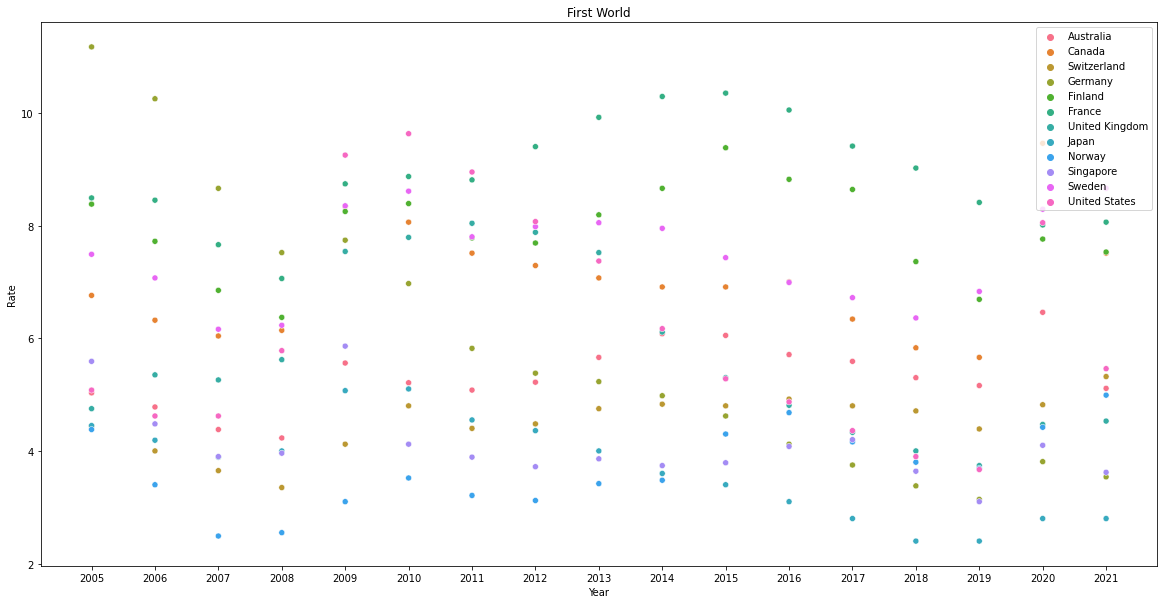

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dfm["Year"], y=dfm["Rate"],hue=dfm["Country Name"])
plt.legend(loc='upper right')
plt.title('First World')

Text(0.5, 1.0, 'Second World')

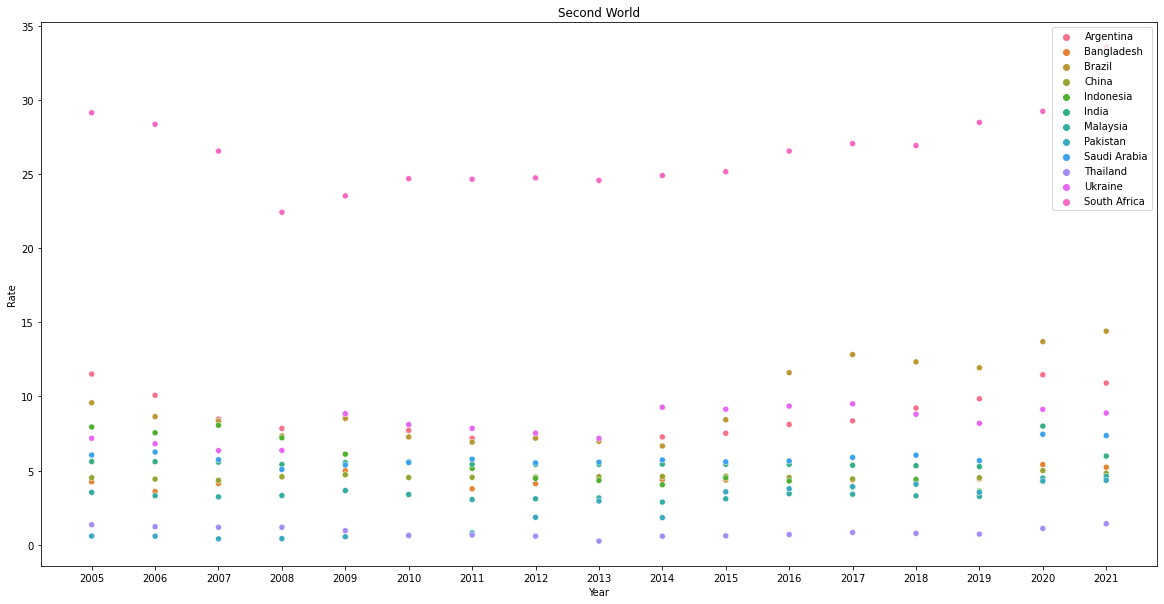

In [80]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dfm_2["Year"], y=dfm_2["Rate"],hue=dfm_2["Country Name"])
plt.legend(loc='upper right')
plt.title('Second World')

Text(0.5, 1.0, 'Third World')

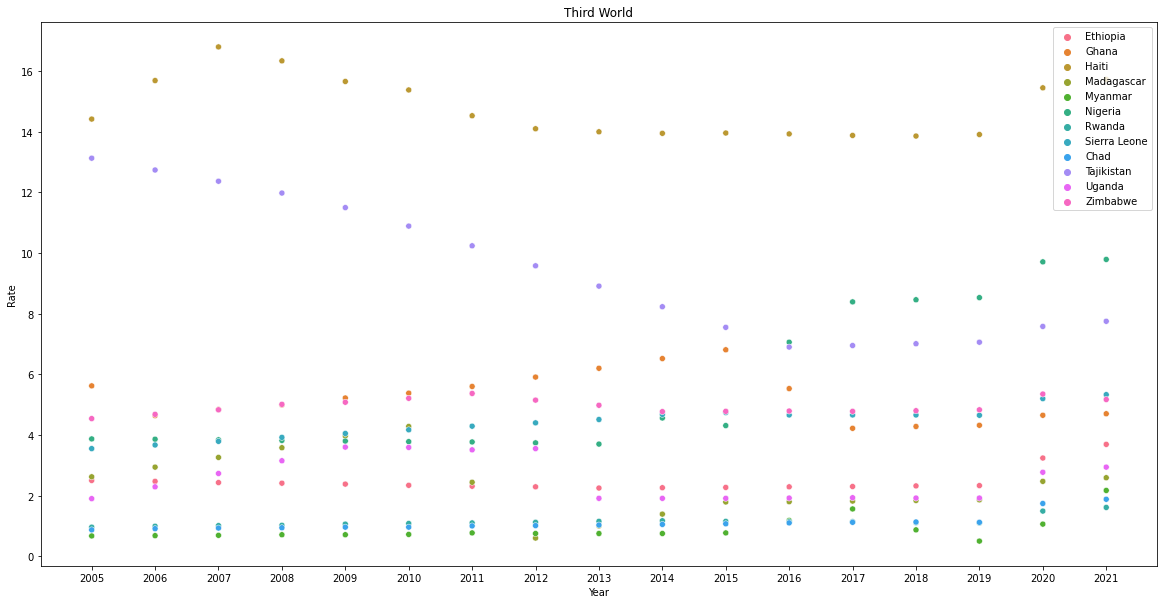

In [81]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=dfm_3["Year"], y=dfm_3["Rate"],hue=dfm_3["Country Name"])
plt.legend(loc='upper right')
plt.title('Third World')

## 2005 To 2010 Period

Text(0.5, 0.98, 'First World')

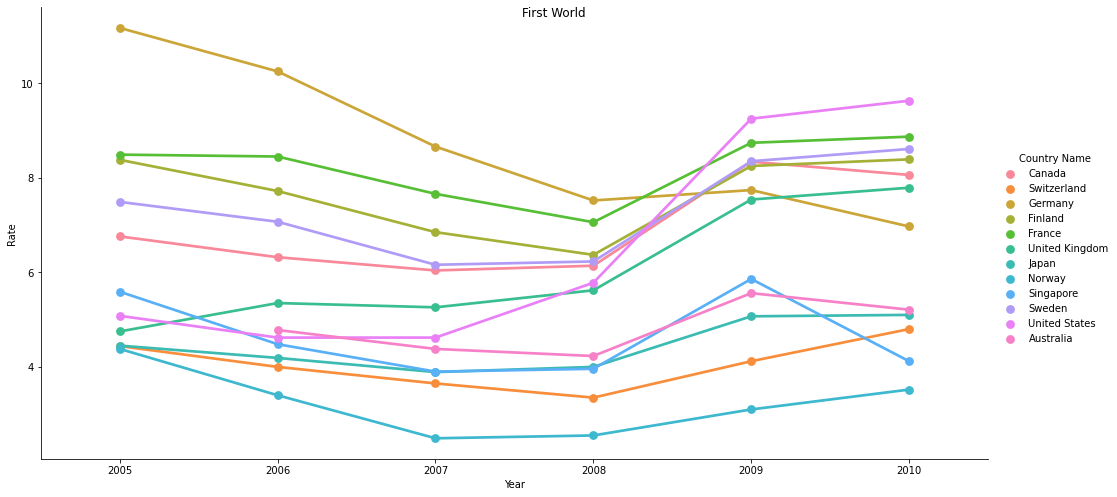

In [82]:
first_1=dfm.iloc[1:72]
ax=sns.catplot(x="Year", y="Rate", hue='Country Name', data=first_1, kind='point',height=7, aspect=2)
ax.fig.suptitle('First World')

#### Sharp increase in unemployment in the first world countries during the 2008 financial crash, while third world countries had relatively lesser rate of increase in unemployment rates.

Text(0.5, 0.98, 'Second World')

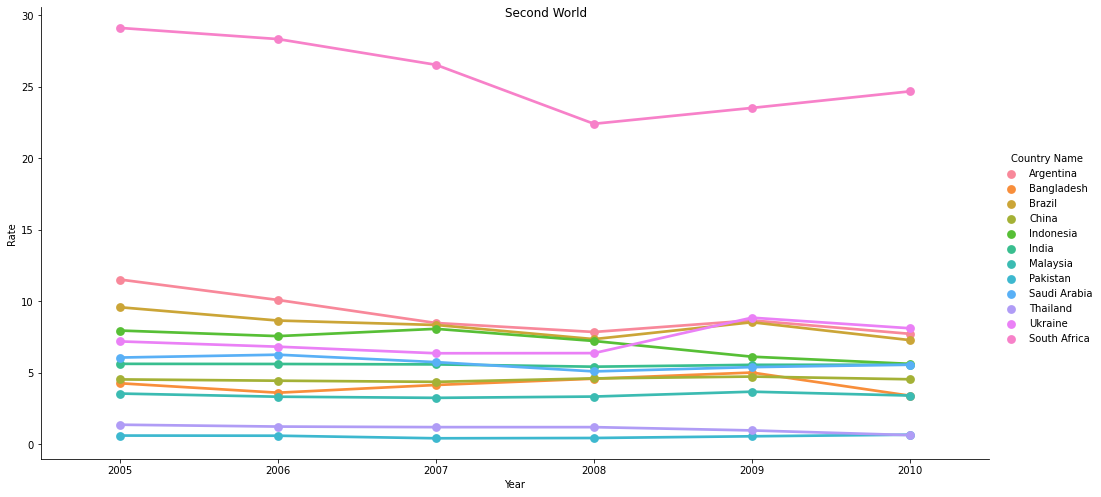

In [54]:
sec_1=dfm_2.iloc[0:72]
rp=sns.catplot(x="Year", y="Rate", hue='Country Name', data=sec_1, kind='point',height=7, aspect=2)
rp.fig.suptitle('Second World')

Text(0.5, 0.98, 'Third World')

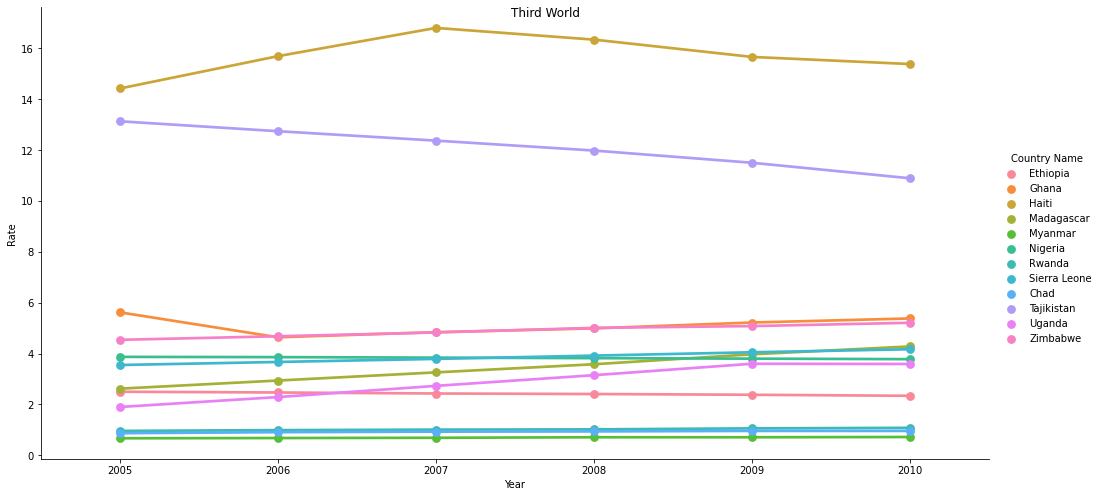

In [57]:
th_1=dfm_3.iloc[0:72]
rp=sns.catplot(x="Year", y="Rate", hue='Country Name', data=th_1, kind='point',height=7, aspect=2)
rp.fig.suptitle('Third World')

## 2011 To 2016 Period

Text(0.5, 0.98, 'First World')

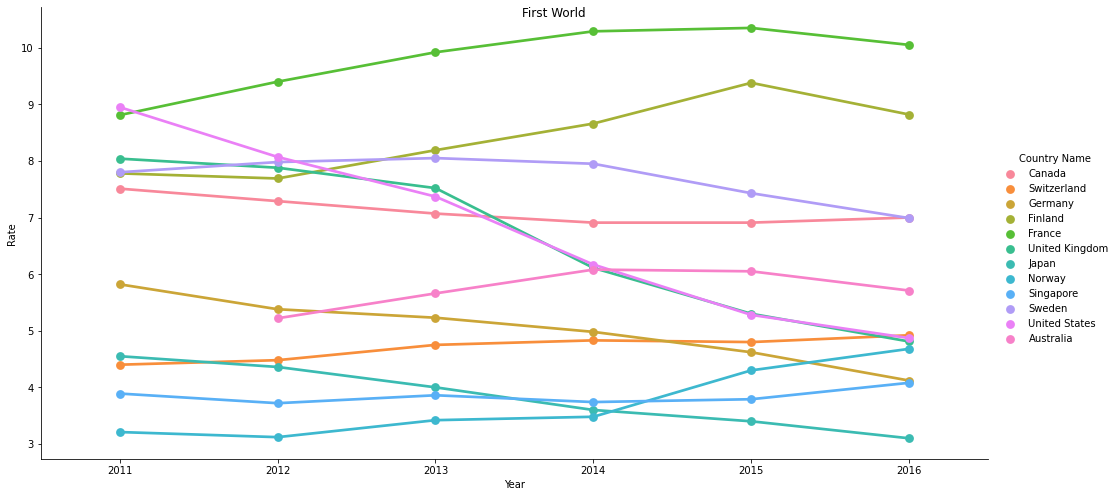

In [46]:
first_2=dfm.iloc[73:144]
ax=sns.catplot(x="Year", y="Rate", hue='Country Name', data=first_2, kind='point',height=7, aspect=2)
ax.fig.suptitle('First World')

Text(0.5, 0.98, 'Second World')

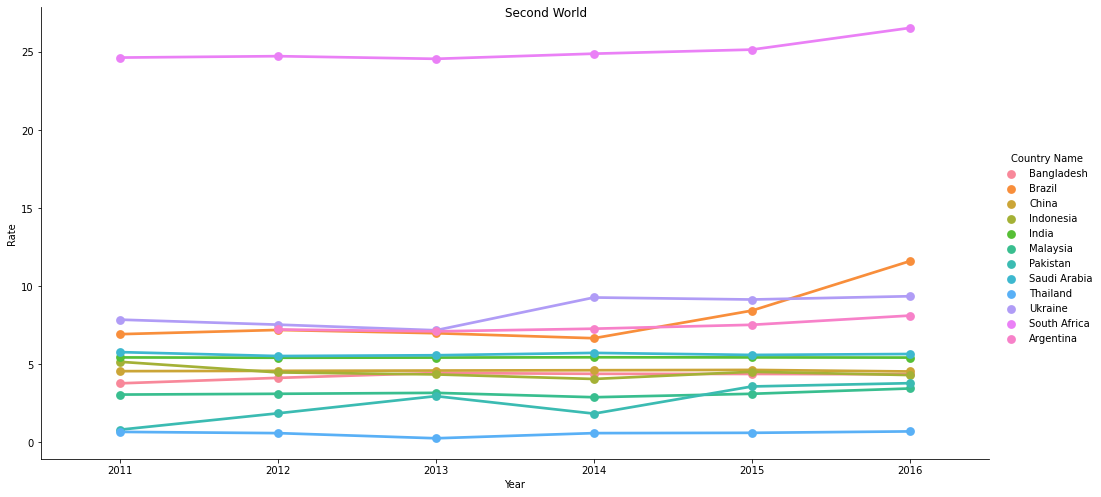

In [75]:
sec_2=dfm_2.iloc[73:144]
ax=sns.catplot(x="Year", y="Rate", hue='Country Name', data=sec_2, kind='point',height=7, aspect=2)
ax.fig.suptitle('Second World')

Text(0.5, 0.98, 'Third World')

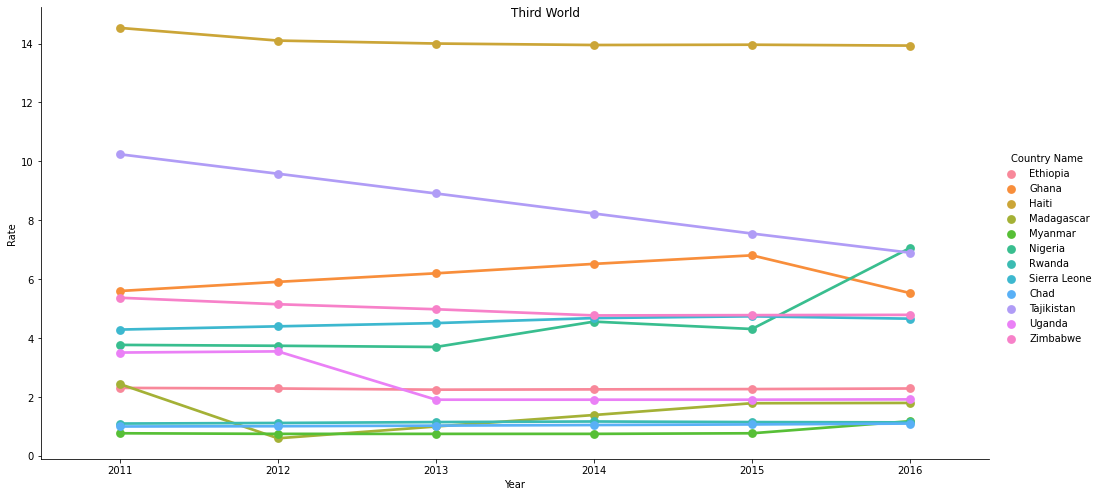

In [74]:
th_2=dfm_3.iloc[72:144]
rp=sns.catplot(x="Year", y="Rate", hue='Country Name', data=th_2, kind='point',height=7, aspect=2)
rp.fig.suptitle('Third World')

## 2017 To 2021 Period

Text(0.5, 0.98, 'First World')

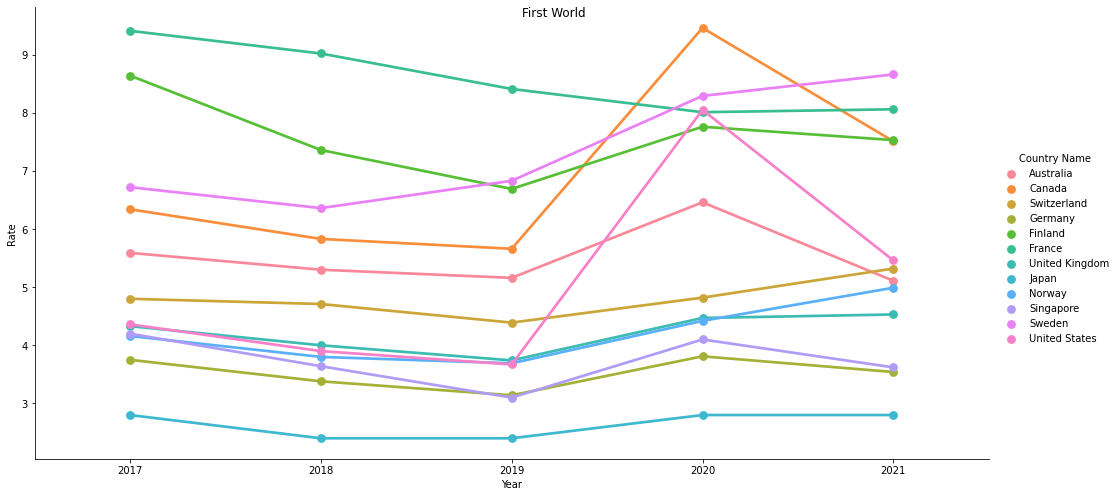

In [60]:
first_3=dfm.iloc[144:205]
ax=sns.catplot(x="Year", y="Rate", hue='Country Name', data=first_3, kind='point',height=7, aspect=2)
ax.fig.suptitle('First World')

#### There is a sharp increase in unemployment in the pandemic period in the first world countries than the second world countries.

Text(0.5, 0.98, 'Second World')

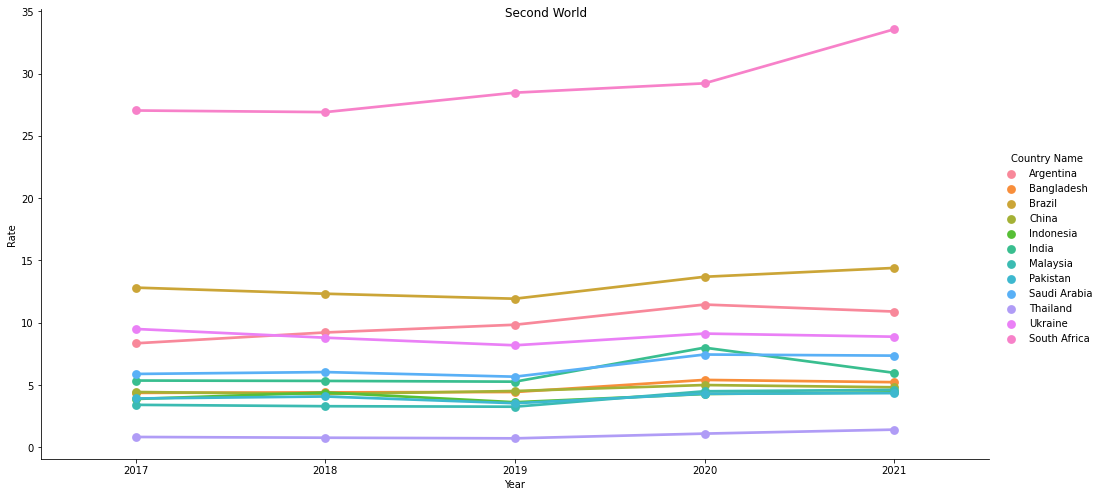

In [61]:
sec_3=dfm_2.iloc[144:205]
ax=sns.catplot(x="Year", y="Rate", hue='Country Name', data=sec_3, kind='point',height=7, aspect=2)
ax.fig.suptitle('Second World')

Text(0.5, 0.98, 'Third World')

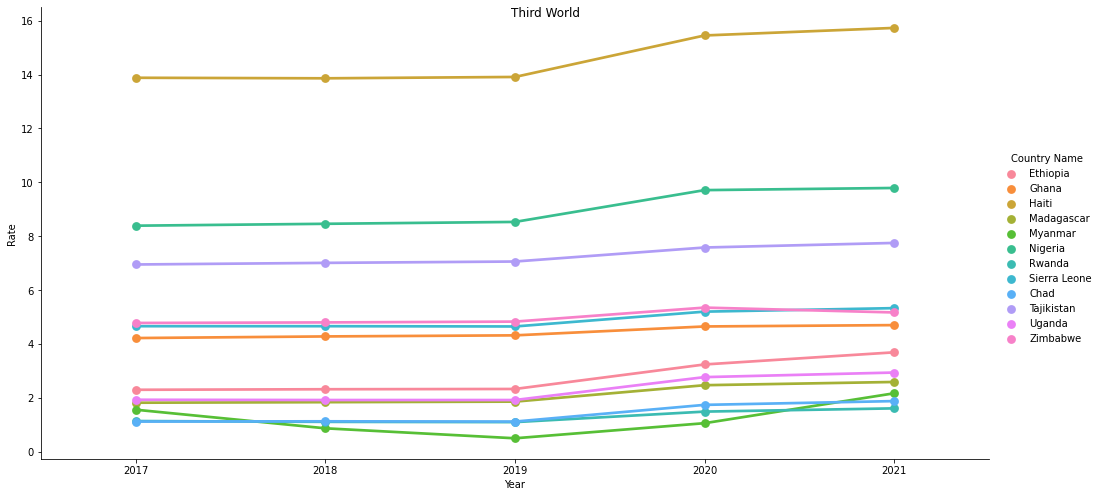

In [62]:
th_3=dfm_3.iloc[144:205]
rp=sns.catplot(x="Year", y="Rate", hue='Country Name', data=th_3, kind='point',height=7, aspect=2)
rp.fig.suptitle('Third World')

In [65]:
first_mean=first.iloc[:,2:19].mean()
sec_mean=sec.iloc[:,2:19].mean()
first_median=first.iloc[:,2:19].median()
sec_median=sec.iloc[:,2:19].median()
third_mean=third.iloc[:,2:19].mean()
third_median=third.iloc[:,2:19].median()

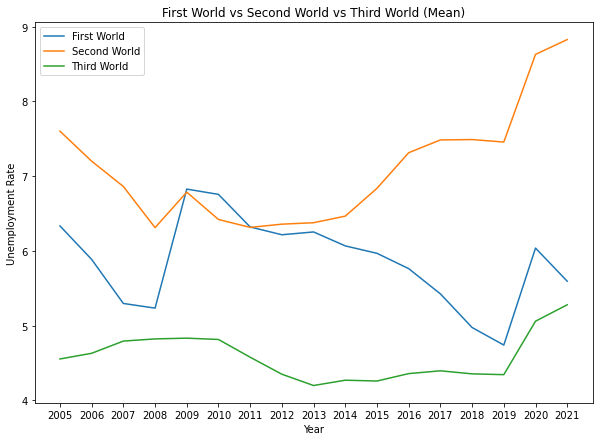

In [69]:
plt.figure(figsize=(10,7))
ax=sns.lineplot(data=first_mean)
sns.lineplot(data=sec_mean)
sns.lineplot(data=third_mean)
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment Rate")
ax.set_title("First World vs Second World vs Third World (Mean)") 
ax.legend(labels=['First World','Second World','Third World'])

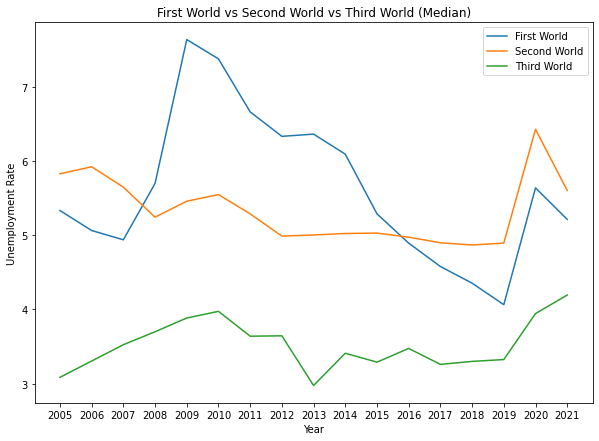

In [71]:
plt.figure(figsize=(10,7))
ax=sns.lineplot(data=first_median)
sns.lineplot(data=sec_median)
sns.lineplot(data=third_median)
ax.set_xlabel("Year")
ax.set_ylabel("Unemployment Rate")
ax.set_title("First World vs Second World vs Third World (Median)") 
ax.legend(labels=['First World','Second World','Third World'])

### CONCLUSIONS

#### 1. In the 2008 to 2011 period , the unemployment rate of first world countries was higher than most of the second world countries.
#### 2. In the pandemic period , both second and first world countries showed increase in unemployment rate and then a subsequent decrease.
#### 3. The third world countries had pretty low unemployment rates indicating self employment or less amount of information, while after the pandemic they showed an increase in unemployment rates.